### 18장 시퀀스 배열로 다루는 순환 신경망(RNN)

- **```순환신경망(Recurrent Neural Network, RNN)```**
    - 등장배경: 과거에 입력된 데이터와 후에 입력된 데이터 사이의 관계 고려의 필요성
    - 앞서 입력받은 데이터 잠시 기억 → 얼마나 중요한지 판단 후 별도의 가중치 지정 → 다음 데이터
    - **```LSTM(Long Short Term Memory)```**: 기울기 소실 문제 보완   
    
        <img src="https://thebook.io/img/080228/262_1.jpg" width="600" align="left">   

#  
#  
#  
#  
#  
###   

- RNN 장점: 입력 및 출력 값 설정에 따라 여러 가지 상황에서 적용 가능
    
① 다수 입력 단일 출력
    
<img src="https://thebook.io/img/080228/262_2.jpg" width="500" align="left">
    
#
#  
#  
#  
#  
#  
#  
###   
    
② 단일 입력 다수 출력
    
<img src="https://thebook.io/img/080228/263_1.jpg" width="500" align="left">

#### 1. LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
# 불러온 데이터를 학습셋과 테스트셋으로 나누기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 6s 3us/step


C:\Users\abcd2\anaconda3\envs\py37\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\abcd2\anaconda3\envs\py37\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
# 데이터 확인하기
category = np.max(Y_train) + 1 # 0부터 세기 때문에 1을 더함
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [6]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [7]:
# 모델의 설정
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [8]:
# 모델의 컴파일
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

C:\Users\abcd2\anaconda3\envs\py37\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 22s 3ms/step - loss: 2.5410 - accuracy: 0.3741 - val_loss: 2.0273 - val_accuracy: 0.4929
Epoch 2/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.9301 - accuracy: 0.4969 - val_loss: 1.8327 - val_accuracy: 0.5294
Epoch 3/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.7637 - accuracy: 0.5381 - val_loss: 1.7453 - val_accuracy: 0.5436
Epoch 4/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6826 - accuracy: 0.5617 - val_loss: 1.7049 - val_accuracy: 0.5744
Epoch 5/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.6043 - accuracy: 0.5898 - val_loss: 1.6180 - val_accuracy: 0.5886
Epoch 6/20
8982/8982 [==============================] - 24s 3ms/step - loss: 1.4791 - accuracy: 0.6219 - val_loss: 1.4859 - val_accuracy: 0.6278
Epoch 7/20
8982/8982 [==============================] - 25s 3ms/step - loss: 1.343

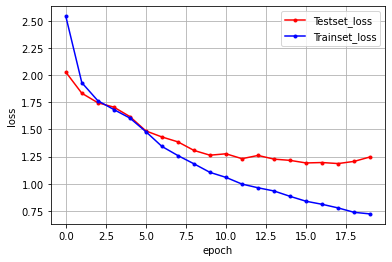

In [12]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 추가하고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()